In [2]:
df_train = pd.read_csv('./train.csv')
df_train.drop('Id', axis=1, inplace=True)
header = df_train.columns.values

In [3]:
df_train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4,4,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4,4,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2,5,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379
3,02/02/2012,Tokat,Other,IL,6,4.5,6,6,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3,4,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [11]:
len(df_train.City.unique())

34

In [22]:
df_train.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4453532.613139
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2576071.595708
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1149870.000000
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2999068.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3939804.000000
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5166635.000000
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,19696939.000000


In [4]:
df_test.fillna

<bound method DataFrame.fillna of           Id   Open Date            City  City Group Type  P1   P2  P3   P4  \
0          0  01/22/2011           Niğde       Other   FC   1  4.0   4  4.0   
1          1  03/18/2011           Konya       Other   IL   3  4.0   4  4.0   
2          2  10/30/2013          Ankara  Big Cities   FC   3  4.0   4  4.0   
3          3  05/06/2013         Kocaeli       Other   IL   2  4.0   4  4.0   
4          4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0   4  4.0   
5          5  11/29/2007       Eskişehir       Other   FC   4  4.5   5  4.0   
6          6  11/05/2008            Rize       Other   FC   4  2.0   4  4.0   
7          7  12/03/2013          Ankara  Big Cities   IL   2  5.0   4  5.0   
8          8  05/30/2006        İstanbul  Big Cities   IL   5  4.0   4  4.0   
9          9  01/20/2012        İstanbul  Big Cities   IL  15  7.5   6  3.0   
10        10  07/04/2008         Kocaeli       Other   IL  12  7.5   6  6.0   
11        11  10/1

In [33]:
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()   

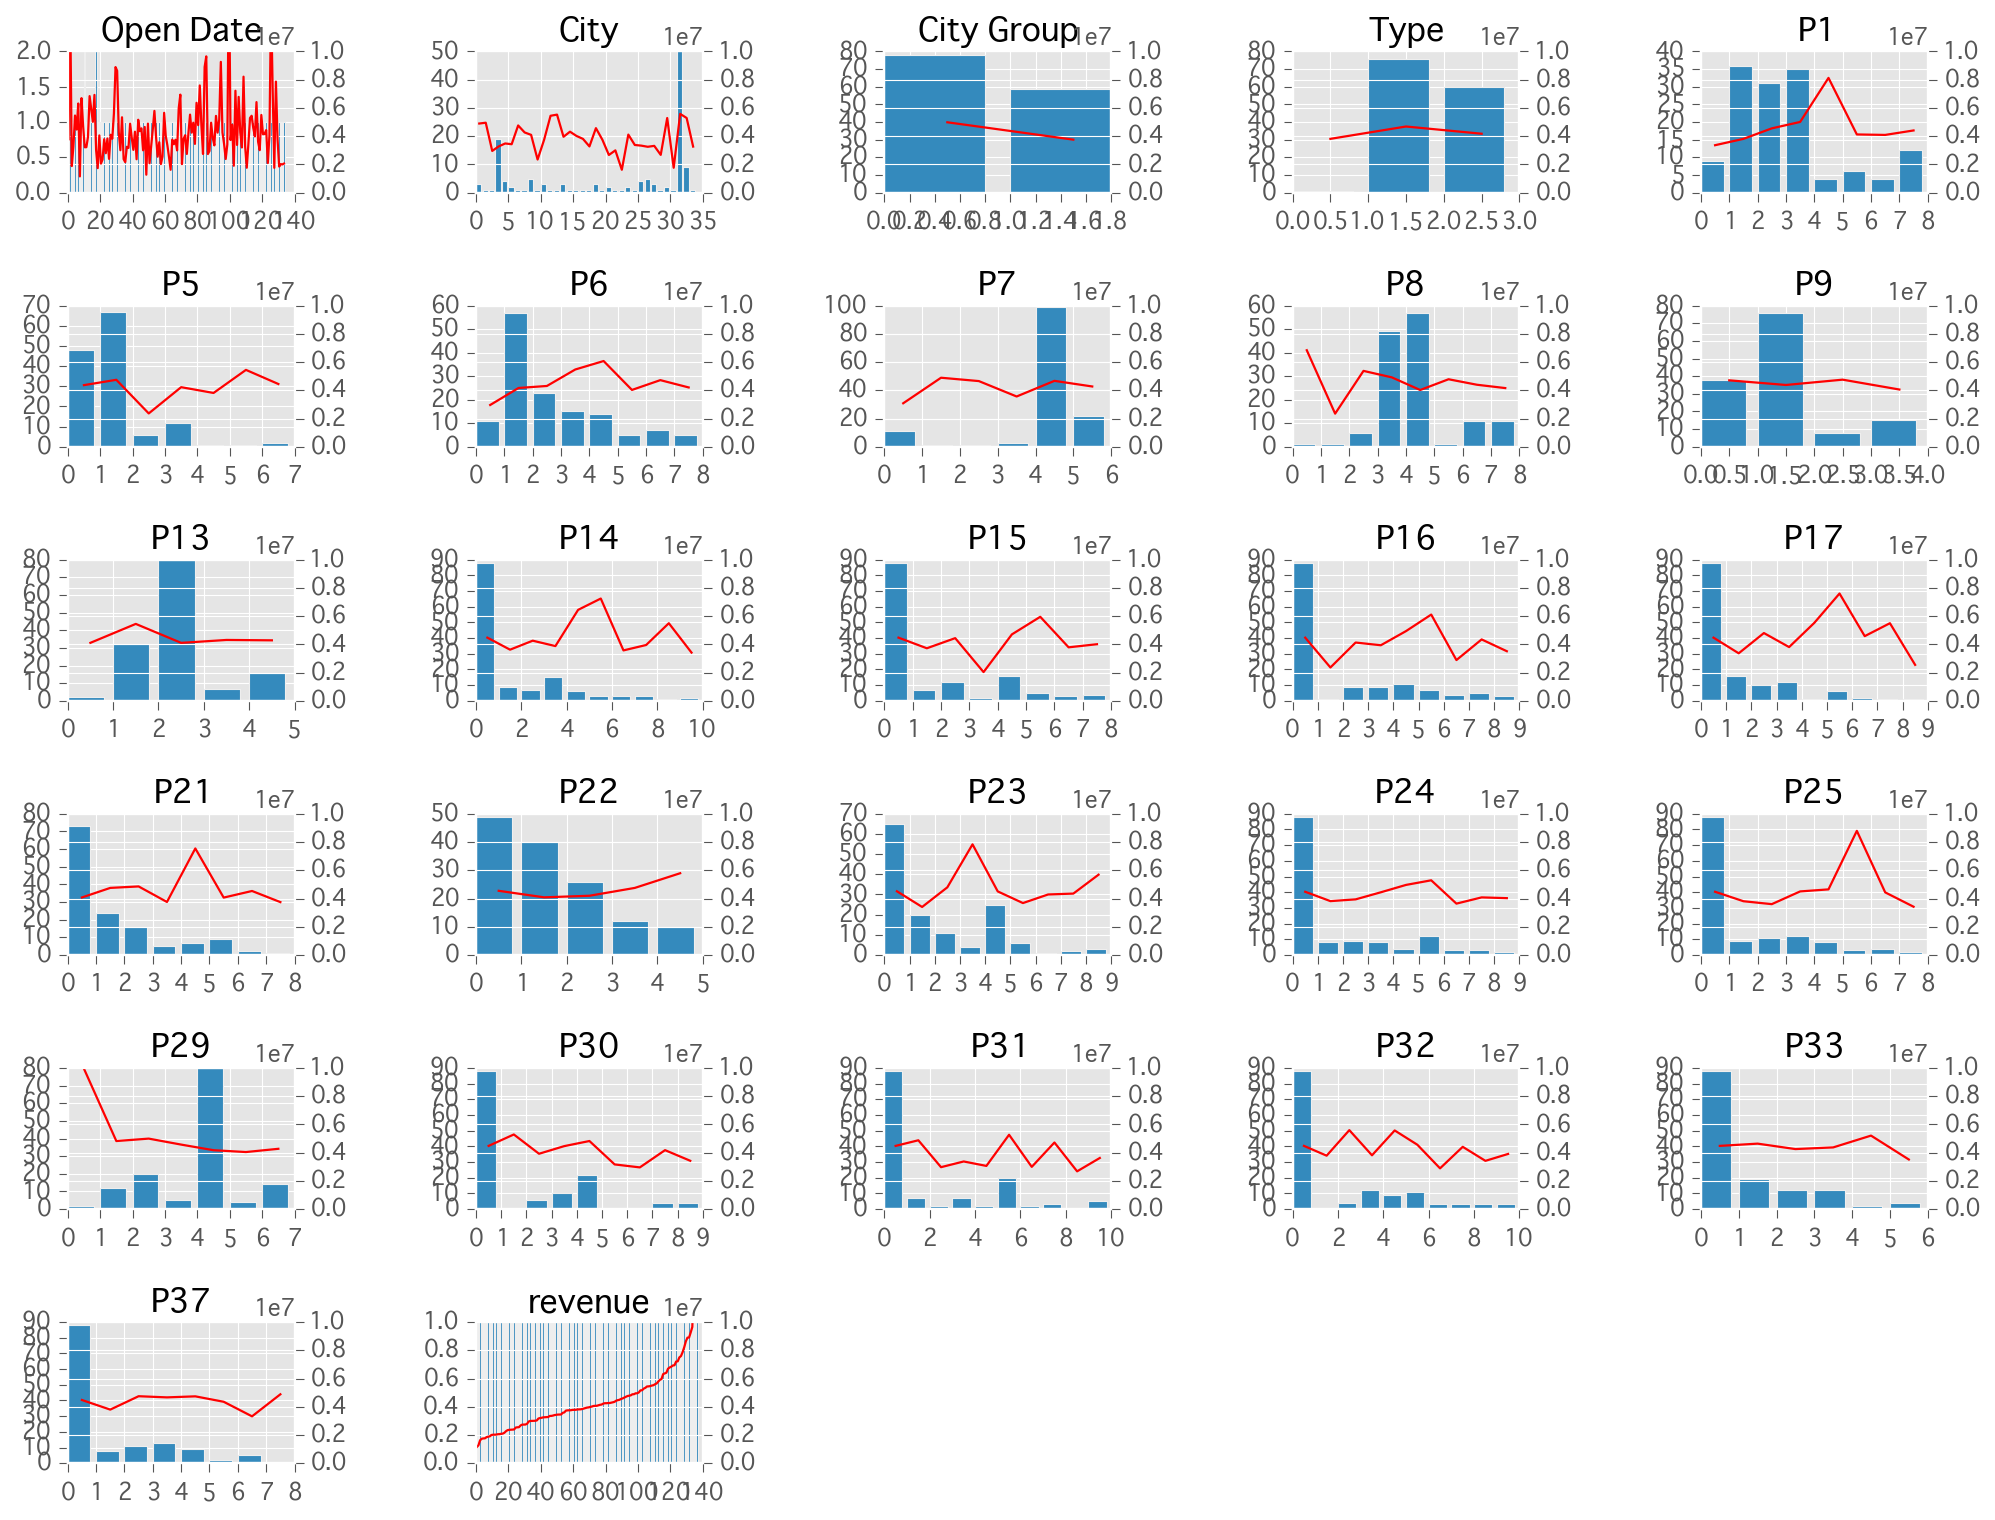

In [40]:
nrows = 8
ncols = 5
fig, axes=plt.subplots(figsize=(15, 15), nrows=nrows, ncols=ncols)
fig.subplots_adjust(hspace = 0.8)
fig.subplots_adjust(wspace = 0.8)
bar_width = 1.

for ix in np.arange(nrows):
    for ix2 in np.arange(ncols):
        col_num = ix*nrows + ix2
        if col_num < len(header):
            col = header[col_num]
            ax = axes[ix][ix2]
            dd = df_train[col].groupby(df_train[col]).count()
            dm = df_train['revenue'].groupby(df_train[col]).mean()
            remove_border(axes[ix][ix2], top=False, right=True, left=True, bottom=True)
            X = np.arange(len(dd.index))
            ax.bar(X, dd.values)
            
            #ax.set_xlabel('Categolical Value')
            #ax.set_ylabel('Count')
            ax.set_title(col)
 
            secondAxis = axes[ix][ix2].twinx()
            secondAxis.set_ylim([0, 10000000])
            secondAxis.plot(X + bar_width / 2., dm.values, 'r-')
            #secondAxis.set_ylabel("Revenue")
        else:
            fig.delaxes(axes[ix][ix2])

In [14]:
df_test = pd.read_csv('./test.csv')
header = df_test.columns.values

In [15]:
df_test.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,28867.657797,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74999.250000,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,99999.000000,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [17]:
len(df_test.City.unique())

57